<br><br>
<span style="font-size:2em;font-weight:lighter;">194.025 Introduction to Machine Learning</span><br>
<span style="font-size:3em;font-weight:normal;line-height:70%;">Assignment 8: Dimensionality Reduction & Distance-based Algorithms</span>

---



Welcome to the 8th assignment of our course **Introduction to Machine Learning**. You will be able to earn up to a total of 10 points. Please read all descriptions carefully to get a full picture of what you have to do. 

**Remark:** Some code cells are put to read-only. Please execute them regardless as they contain important code. You can run a jupyter cell by pressing `SHIFT + ENTER`, or by pressing the play button on top (in the row where you can find the save button). Cells where you have to implement code contain the comment `# YOUR CODE HERE` followed by `raise NotImplementedError`. Simply remove the `raise NotImplementedError`and insert your code.

Some other code cells start with the comment `# hidden tests ...`. Please do not change them in any way as they are used to grade the tasks after your submission.

**NOTE**: in order for the automated tests to work correctly, please **do not** create any variable/function/class name beginning with a leading underscore, e.g., `_my_variable` or with the word 'solution', e.g., `solution_variable`.

This assignment will cover some hands-on experiments with dimensionality reduction and distance-based algorithms.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

#### Approximating Eigenvalues for PCA (2.5 Points)

Let's generate some 2-dimensional data and compute the covariance matrix. Note that, while the covariance matrix is provided to generate the data, you should compute the _data_ covariance matrix using the points you generate. Remember to center the data before computing the covariance matrix: the columns of the centered data should have mean $\approx 0$.

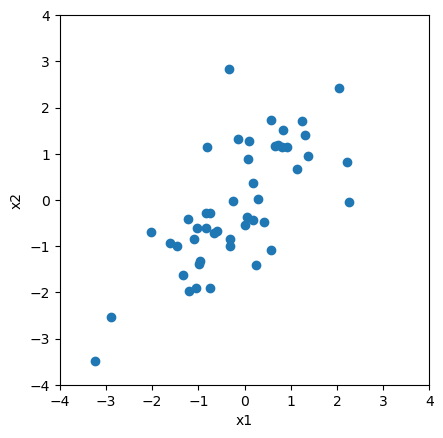

Mean of variables. x1: -0.236, x2: -0.287. This is not good, as it needs to be close to zero!


In [12]:
# Create data.
np.random.seed(17)
generating_cov_matrix = [[1.4, 1.3], [1.3, 2]]
points = np.random.multivariate_normal([0, 0], generating_cov_matrix, size=50)
x1 = points[:, 0]
x2 = points[:, 1]

fig, ax = plt.subplots()

ax.set_aspect('equal')
ax.set_xlim((-4, 4))
ax.set_ylim((-4, 4))
ax.set_xlabel("x1")
ax.set_ylabel("x2")

plt.scatter(x1, x2)
plt.show()

print(f"Mean of variables. x1: {np.mean(x1):.3f}, x2: {np.mean(x2):.3f}. This is not good, as it needs to be close to zero!")

# Center data and store it in X and compute covariance matrix.
X = None  # np.shape(X) = (50, 2)
cov_matrix = None

# YOUR CODE HERE
#raise NotImplementedError()

X_raw = np.column_stack((x1, x2))         # Shape (50, 2)
X = X_raw - np.mean(X_raw, axis=0)        # Center each column (feature)

cov_matrix = (1/(X.shape[0] - 1)) * X.T @ X

In [13]:
# Hidden tests. DO NOT CHANGE THIS CELL.

Say we want to perform PCA on this toy data to find its principal components. As seen during the lecture, one can compute the principal components by computing the eigenvectors of `cov_matrix`. The eigenvectors can be computed by solving the `characteristic equation` of the covariance matrix. Solving this equation can, however, become time-consuming for large covariance matrices.

Luckily, one can _approximate_ the eigenvectors of a matrix using the [power method](https://ergodic.ugr.es/cphys/lecciones/fortran/power_method.pdf). Implement the power method to approximate the eigenvector associated to the largest eigenvalue of a matrix and obtain the eigenvector of `cov_matrix`.
Store the eigenvector in `eigenvector_1` and its corresponding eigenvalue in `eigenvalue_1`.

In [28]:
def power_iteration(A, num_iterations: int = 10):
    # YOUR CODE HERE
    initial_nonzero_vector = np.ones(A.shape[1])
    x = initial_nonzero_vector
    
    for _ in range(num_iterations):
        x = A @ x
        x = x / np.linalg.norm(x)  # Normalize the vector
    return x
    
    
# Compute the first eigenvector/value and store them in these variables.
eigenvector_1 = None 
eigenvalue_1 =  None
    
# YOUR CODE HERE

eigenvector_1 = power_iteration(cov_matrix)
eigenvalue_1 = eigenvector_1.T @ cov_matrix @ eigenvector_1 # Rayleigh quotient (if x normalized)

In [29]:
# Hidden tests. DO NOT CHANGE THIS CELL.

Let $M$ be a matrix with the eigenvector $v_1$ corresponding to the largest eigenvalue $\lambda_1$. Note that $v_1$ is a column vector.
Consider now a matrix $M' = M - \lambda_1 v_1v_1^T$: the largest eigenvalue and corresponding eigenvector of $M'$ are equivalent to the second largest eigenvalue and corresponding eigenvector of $M$. Use this information and compute the second largest eigenvalue and corresponding eigenvector of `cov_matrix`.

In [34]:
# Compute cov_matrix_prime as instructed above, obtain the second eigenvector/value and store them in these variables.
eigenvector_2 = None
eigenvalue_2 = None
cov_matrix_prime = None

# YOUR CODE HERE
#raise NotImplementedError()

cov_matrix_prime = cov_matrix - eigenvalue_1 * np.outer(eigenvector_1, eigenvector_1.T)
eigenvector_2 = power_iteration(cov_matrix_prime)
eigenvalue_2 = eigenvector_2.T @ cov_matrix @ eigenvector_2 

In [35]:
# Hidden tests. DO NOT CHANGE THIS CELL.

#### How PCA improves classification (2.5 Points)

We will now consider an example that shows how PCA can practically improve classification performance.

First, load `pca_data.csv`. The dataset contains 1000 points in 40 dimensions, with the first 40 columns corresponding to the features `X` and the last column corresponding to the label `y`. Once you have loaded the dataset, split it in a training and testing dataset using `train_test_split(X, y, test_size=0.33, random_state=42)`. Please, do not change the random state to make sure you obtain results which are consistent to ours.

In [37]:
from sklearn.model_selection import train_test_split

X = None  # np.shape(X) = (1000, 40)
y = None  # np.shape(y) = (1000,)

X_train = None  # np.shape(X_train) = (670, 40)
X_test = None
y_train = None  # np.shape(y_train) = (670,)
y_test = None  

# YOUR CODE HERE

pca_data = pd.read_csv("pca_data.csv")

X = pca_data.iloc[:, :-1].values  # shape (1000, 40)
y = pca_data.iloc[:, -1].values   # shape (1000,)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
# Hidden tests. DO NOT CHANGE THIS CELL.

Now, train a Nearest Neighbour classifier with `k=3` on `X_train` and test its performance on `X_test`. 

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# YOUR CODE HERE

# Initialize the classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy without PCA: {accuracy:.4f}")

Accuracy without PCA: 0.5758


The classifier does not perform terribly bad, but the data is 40-dimensional and, maybe, not all features are useful for classification. Let's try and apply PCA to the data and re-perform the classification. While you can use any existing library implementation to compute PCA itself, let's first have a closer look at the data to choose how many principal components we may want. 

First, we want to compute the covariance matrix `cov_matrix` of `X`. As we saw during the lecture, performing PCA consists in computing the eigenvalues/vectors of `cov_matrix`. Do so, and sort the eigenvalues $\lambda_i$ in a decreasing order. For each eigenvalue, you can compute the percentage explained variance as $\displaystyle\frac{\lambda_i}{\sum_{j=1}^{40} \lambda_j}$.

Compute and plot the explained variances in a decreasing order. A rule of thumb to pick the number of PCA components is to stop when the plot bends and the variance does not descrease significantly if more components are considered. Store the explained variance is the `explained_variance` array, with `np.shape(explained_variance) = (40,)`.

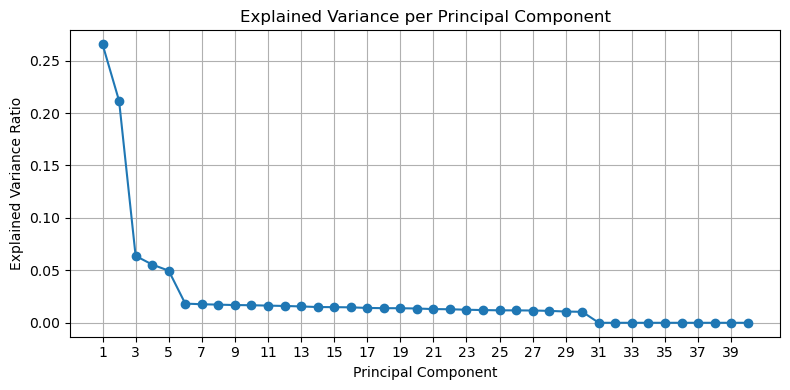

In [52]:
# Compute the covariance matrix and store it in cov_matrix. 
# Then, compute the eigenvalues and obtained the explained variance for each of them.
# Finally, compute the explained variances and store the result in the `explained_variance` variable.

centered_X = None
cov_matrix = None
explained_variance = None  # np.shape(explained_variance) = (40,)

# YOUR CODE HERE
#raise NotImplementedError()

# X = X_raw - np.mean(X_raw, axis=0)
centered_X = X - np.mean(X, axis=0)
cov_matrix = (1/(centered_X.shape[0] - 1)) * centered_X.T @ centered_X

# Compute eigenvalues of the covariance matrix
eigenvalues, _ = np.linalg.eigh(cov_matrix)  # eigh is better for symmetric matrices

# Sort eigenvalues in descending order
sorted_eigenvalues = np.flip(np.sort(eigenvalues))

# Compute explained variance (percentage)
explained_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)

plt.figure(figsize=(8, 4))
plt.plot(np.arange(1, 41), explained_variance, marker='o')
plt.title("Explained Variance per Principal Component")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.xticks(np.arange(1, 41, step=2))
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
# Hidden tests. DO NOT CHANGE THIS CELL.

You should now have an idea of how many PC you should consider. Perform PCA on `X`, project `X_train` and `X_test` on the components you obtain with PCA, and finally train/test nearest neighbours again. You should see an improvement in performance.

In [61]:
# YOUR CODE HERE

# Use the number of principal components determined from explained variance
n_components = 5

# Fit PCA on the full feature matrix X (only the features, not labels)
pca = PCA(n_components=n_components)
pca.fit(X)

# Project X_train and X_test using the PCA transformation
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a 3-NN classifier on the projected training data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, y_train)

# Predict and evaluate on the test set
y_pred = knn.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy with PCA ({n_components} components): {accuracy:.4f}")

Accuracy with PCA (5 components): 0.7606


For this simple problem, you can actually perform PCA with $1$ to $40$ components; each time, re-train k-NN and compute its performance.

In [62]:
for dim in range(1, 41):
    # YOUR CODE HERE
    # Apply PCA with `dim` components
    pca = PCA(n_components=dim)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # Train k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train_pca, y_train)
    y_pred = knn.predict(X_test_pca)
    
    print(f"PCs: {dim}. Acc: {accuracy_score(y_pred, y_test):.2f}")

PCs: 1. Acc: 0.38
PCs: 2. Acc: 0.44
PCs: 3. Acc: 0.53
PCs: 4. Acc: 0.59
PCs: 5. Acc: 0.77
PCs: 6. Acc: 0.72
PCs: 7. Acc: 0.72
PCs: 8. Acc: 0.68
PCs: 9. Acc: 0.71
PCs: 10. Acc: 0.70
PCs: 11. Acc: 0.66
PCs: 12. Acc: 0.67
PCs: 13. Acc: 0.66
PCs: 14. Acc: 0.68
PCs: 15. Acc: 0.66
PCs: 16. Acc: 0.64
PCs: 17. Acc: 0.62
PCs: 18. Acc: 0.62
PCs: 19. Acc: 0.63
PCs: 20. Acc: 0.59
PCs: 21. Acc: 0.60
PCs: 22. Acc: 0.61
PCs: 23. Acc: 0.60
PCs: 24. Acc: 0.62
PCs: 25. Acc: 0.60
PCs: 26. Acc: 0.59
PCs: 27. Acc: 0.60
PCs: 28. Acc: 0.59
PCs: 29. Acc: 0.56
PCs: 30. Acc: 0.58
PCs: 31. Acc: 0.58
PCs: 32. Acc: 0.58
PCs: 33. Acc: 0.58
PCs: 34. Acc: 0.58
PCs: 35. Acc: 0.58
PCs: 36. Acc: 0.58
PCs: 37. Acc: 0.58
PCs: 38. Acc: 0.58
PCs: 39. Acc: 0.58
PCs: 40. Acc: 0.58


Looking at your results, you may be able to infer some properties about the data itself. The data was generated with `n_features=40, n_informative=?, n_redundant=?`. The informative features are the ones that actually contain useful information to perform classification, while the redundant features are linear combinations of the informative ones and thus provide no additional information. The remaining features are random noise.

The results of k-NN and of the explained variance should allow you to make an educated guess on `n_informative` and `n_redundant`. 

In [95]:
n_informative = None  # int
n_redundant = None  # int

# YOUR CODE HERE
#raise NotImplementedError()

n_informative = 5
n_redundant = 11

In [96]:
# Hidden tests. DO NOT CHANGE THIS CELL.

#### k-NN in high dimensions (2.5 Points)

High-dimensional data is often problematic. The expression _curse of dimensionality_ refers to a series of undesirable (and often unintuitive) phenomena that are observed in high dimensional data and that may lead to bad performance in, e.g., a machine learning task.

k-NN relies on the assumption that points which are close to each other share the same label. How does this assumption break in high dimensions? We will consider unit (hyper-)cubes in $d$ dimensions, that is, (hyper-)cubes with edges of length $1$. Each dimension will thus have values in the interval $[0, 1]$.

We will start with a simple, 3-dimensional example. First, sample 1000 uniformly distributed points in 3 dimensions, and store the result in `data`.

In [82]:
np.random.seed(42)  # Do not change the seed to make sure the tests run correctly.

n = 1000
d = 3
k = 3

data = np.random.rand(n, d)

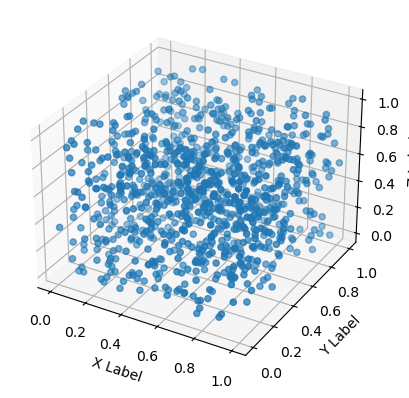

In [83]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(data[:,0], data[:,1], data[:,2])
ax.scatter(0.5, 0.5, 0.5, c='red')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In this example, uniformly distributed data should look, indeed, uniformly distributed in the three dimensional space. We will now see how this intuition breaks in higher dimensions.

Now, pick a `test_point` located at the centre of the cube, i.e., at coordinate `[0.5, 0.5, 0.5]`. From this point, compute the length of the edge of the cube centered in `test_point` and which contains the closest 3 neighbours. Save this length in the variable `edge_length_3d`. The picture below should make the task clear with a 2-dimensional example.

<img src="smallest_square.png" alt="smallest_square" width="300"/>

In this 2-dimensional example, the blue square is the smallest square centered in the test point which contains 3 neighbours. The length of its side is what the tasks requires to find.

In [101]:
def compute_hypercube_containing_neighbours(data, k):
    # YOUR CODE HERE
    test_point = np.full(data.shape[1], 0.5)
    distances = np.linalg.norm(data - test_point, axis=1)
    nearest_indices = np.argsort(distances)[:k]
    nearest_points = data[nearest_indices]
    
    # Compute edge length
    max_offset = np.max(np.abs(nearest_points - test_point))
    edge_length = 2 * max_offset
    return edge_length
    
edge_length_3d = None
    
# YOUR CODE HERE
edge_length_3d = compute_hypercube_containing_neighbours(data, k)

In [102]:
# Hidden tests. DO NOT CHANGE THIS CELL.

How does the length of the edge change when increasing the dimensionality of the problem? Generate `n=1000` points in `dim` dimensions, and check the length of the edge with `k=3` neighbours. Store the edges in the `edges` list, with dimensions increasing from `dim=1` to `dim=50`.

In [103]:
edges = []
for dim in range(1, 51, 1):
    np.random.seed(42)  # Do not change the seed to make sure the tests run correctly.
    data = np.random.rand(1000, dim)
    # YOUR CODE HERE
    edge_length = compute_hypercube_containing_neighbours(data, k)
    edges.append(edge_length)

In [104]:
# Hidden tests. DO NOT CHANGE THIS CELL.

If we try and visualise (run, e.g., `plt.plot(edges)`) how the edge length increases with the dimensionality of data, we see it quickly approaches 1. This means that, even for _only_ 50 dimensions, all data points are essentially located very close to the faces of the hypercube: all nearest neighbours are not _near_ at all, and thus the underlying assumption that points which are near should share the label does not hold anymore. If we denote the edge length by $l$, it can be in fact shown that $l \approx \left(\frac{k}{n}\right)^{1/d}$ for $d$ dimensional data.

#### k-NN and Bayes Optimal Classifier (2 Points)

Remember that for a given classification problem and a given dataset, the Bayes classifier has the smallest probability of misclassification and we can think of it as the "best possible classifier" for our problem. How does $k$-NN compare to it?

Consider a 2-class, 1-dimensional classification problem, and assume data is generated according to the following distributions, where the blue $f_0$ coresponds the class `0` and the brown $f_1$ denotes the class `1`.

<img src="nn_bayes.png" alt="nn_bayes" width="300"/>/
>

* What distribution does the density $f = \frac{1}{2}f_0 + \frac{1}{2}f_1$ follow?
  For example, if it follows a normal distribution, please write `distribution = "Normal distribution"` or `distribution = "normal"`. The capitalization of your answer does not matter.

* The risk of the Bayes classifier can be obtained by solving the integral $R^* = \int_0^1 \min{(x, 1-x)} \mathrm{d}x$. What is the value of the Bayes risk? Can you see what this integral corresponds to in the plot above?
  For example, if the Bayes risk is 0.312, please write `bayes_risk = 0.312`.

In [133]:
# Answer using strings.
distribution = "None"
bayes_risk = 0

# YOUR CODE HERE
#raise NotImplementedError()


# f = 1/2 * (2 - 2x) + 1/2 * 2x
# f = 1 - x + x
# f = 1 → uniform distribution
distribution = "uniform"

# R* = (1/2) * ∫(0, 0.5): 2x dx + (1/2) * ∫(0.5, 1): (2 - 2x) dx
#     = (1/2) * (0.25 + 0.25)
#     = 0.25
bayes_risk = 0.25

In [134]:
# Hidden tests. DO NOT CHANGE THIS CELL.

We will now solve a 1-NN problem designed following the plot above. First let's generate the data for both classes. $n$ will parametrize how many data points we generate.

To check that data is generated correctly, you can plot a histogram of your values and visually verify that it follows one of the two distributions in the plot above. For the visualization, generate $n\approx 10^5$ points for each class.

In [135]:
np.random.seed(42)  # Do not change the seed to make sure the tests run correctly.

n = int(1e5)

X = None  #np.shape(X) = (200000, 1), if you generate 100000 points per class
y = None  #np.shape(y) = (200000,), if you generate 100000 points per class

# YOUR CODE HERE

np.random.seed(42)
n = 100000

# Should generate data following the distribution f,
# where class 0 follows the distribution f_0,
# and class 1 follows the distribution f_1.
def generate_triangle_data(n):
    # YOUR CODE HERE
    
    # Uniform random numbers
    u0 = np.random.rand(n)
    u1 = np.random.rand(n)
    
    # Inverse transform sampling

    # Class 0 (f0): f0(x) = 2 - 2x
    # CDF of f0 is F0(x) = 2x - x^2
    # To sample from this, we solve u = 2x - x^2
    # Which gives the inverse: x = 1 - sqrt(1 - u)
    x0 = 1 - np.sqrt(1 - u0)  # class 0: decreasing triangle

    # Class 1 (f1): f1(x) = 2x
    # CDF of f1 is F1(x) = x^2
    # To sample from this, we solve u = x^2 → x = sqrt(u)
    x1 = np.sqrt(u1)          # class 1: increasing triangle
    
    # Stack and label
    X = np.concatenate([x0, x1]).reshape(-1, 1)
    y = np.concatenate([np.zeros(n), np.ones(n)])
    
    return X, y

X, y = generate_triangle_data(n)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [136]:
# Hidden tests. DO NOT CHANGE THIS CELL.

Now, train and test a 1-NN classifier and compute its error rate.

In [137]:
error_rate = 0.99  # Compute the error rate and save it in this variable. Should be in [0, 1].
# YOUR CODE HERE
#raise NotImplementedError()

# Train 1-NN classifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Compute error rate
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy

print(f"1-NN Error Rate: {error_rate:.4f}")

1-NN Error Rate: 0.3320


If the following test fails, increase the number of points you generate for your problem.

In [138]:
# Hidden tests. DO NOT CHANGE THIS CELL.

For this specific setting, one can actually compute the NN risk $R_{NN}$. For 1-NN in a binary classification context [one can show](https://isl.stanford.edu/~cover/papers/transIT/0021cove.pdf) that $R^* \le R_{NN} \le 2R^*(1-R^*)$. You should find that the error rate you experimentally obtained for k-NN and the one you analytically computed for the Bayes classifier do, indeed, follow these inequalities.

#### On the Bayes classifier (0.5 Points)

Consider a binary classification problem and suppose you know the Bayes error rate is $0.5$:
* Q1: What is the minimum error rate another classifier can have?
* Q2: What is the maximum error rate another classifier can have?

In [142]:
q1 = 0.99  # float, should be in [0, 1]
q2 = 0.99  # float, should be in [0, 1]

# YOUR CODE HERE
#raise NotImplementedError()

bayes_risk = 0.5

q1 = bayes_risk          # minimum possible error
q2 = 1 - bayes_risk      # maximum possible error



In [143]:
# Hidden tests. DO NOT CHANGE THIS CELL.